In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
from torch.utils.data import DataLoader,sampler,Dataset
import torchvision.datasets as dset
import torchvision.transforms as T
import timeit
from PIL import Image
import os
import numpy as np
import scipy.io
#plotting and visualization library
import matplotlib.pyplot as plt
#Display on the notebook
%matplotlib inline
plt.ion() #Turn interactive mode on.
import torch.nn.functional as F

In [ ]:
!gdown -O data.zip "https://drive.google.com/u/0/uc?id=1zVfDe6vKUStnlj1jaNrsgsM41YhYuJDg&export=download"

Downloading...
From: https://drive.google.com/u/0/uc?id=1zVfDe6vKUStnlj1jaNrsgsM41YhYuJDg&export=download
To: /content/data.zip
100% 65.4M/65.4M [00:02<00:00, 22.0MB/s]


In [ ]:
!unzip data.zip

Streaming output truncated to the last 5000 lines.
  inflating: data/valClips/00981/1.jpg  
  inflating: data/valClips/00981/2.jpg  
  inflating: data/valClips/00981/3.jpg  
   creating: data/valClips/00982/
  inflating: data/valClips/00982/1.jpg  
  inflating: data/valClips/00982/2.jpg  
  inflating: data/valClips/00982/3.jpg  
   creating: data/valClips/00983/
  inflating: data/valClips/00983/1.jpg  
  inflating: data/valClips/00983/2.jpg  
  inflating: data/valClips/00983/3.jpg  
   creating: data/valClips/00984/
  inflating: data/valClips/00984/1.jpg  
  inflating: data/valClips/00984/2.jpg  
  inflating: data/valClips/00984/3.jpg  
   creating: data/valClips/00985/
  inflating: data/valClips/00985/1.jpg  
  inflating: data/valClips/00985/2.jpg  
  inflating: data/valClips/00985/3.jpg  
   creating: data/valClips/00986/
  inflating: data/valClips/00986/1.jpg  
  inflating: data/valClips/00986/2.jpg  
  inflating: data/valClips/00986/3.jpg  
   creating: data/valClips/00987/
  infla

In [ ]:
label_mat=scipy.io.loadmat('./data/q3_2_data.mat')
label_train=label_mat['trLb']
print(len(label_train))
label_val=label_mat['valLb']
print(len(label_val))

7770
2230


In [ ]:
set(label_train.reshape(-1)),set(label_val.reshape(-1))

({1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0},
 {1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0})

# Input Image

In [ ]:

class ActionDataset(Dataset):
    """Action dataset."""

    def __init__(self,  root_dir,labels=[], transform=None):
        """
        Args:
            root_dir (string): Directory with all the images.
            labels(list): labels if images.
            transform (callable, optional): Optional transform to be applied on a sample.
        """
        self.root_dir = root_dir
        self.transform = transform
        self.length=len(os.listdir(self.root_dir))
        self.labels=labels
    def __len__(self):
        return self.length*3

    def __getitem__(self, idx):
        folder=idx/3+1
        imidx=idx%3+1
        folder=format(int(folder),'05d')
        imgname=str(imidx)+'.jpg'
        img_path = os.path.join(self.root_dir,
                                folder,imgname)
        image = Image.open(img_path)
        if len(self.labels)!=0:
            Label=self.labels[idx//3][0]-1
        if self.transform:
            image = self.transform(image)
        if len(self.labels)!=0:
            sample={'image':image,'img_path':img_path,'Label':Label}
        else:
            sample={'image':image,'img_path':img_path}
        return sample


In [ ]:
image_dataset=ActionDataset(root_dir='./data/trainClips/',labels=label_train,transform=T.ToTensor())

#iterating though the dataset
for i in range(10):
    sample=image_dataset[i]
    print(sample['image'].shape)
    print(sample['Label'])
    print(sample['img_path'])



torch.Size([3, 64, 64])
0.0
./data/trainClips/00001/1.jpg
torch.Size([3, 64, 64])
0.0
./data/trainClips/00001/2.jpg
torch.Size([3, 64, 64])
0.0
./data/trainClips/00001/3.jpg
torch.Size([3, 64, 64])
0.0
./data/trainClips/00002/1.jpg
torch.Size([3, 64, 64])
0.0
./data/trainClips/00002/2.jpg
torch.Size([3, 64, 64])
0.0
./data/trainClips/00002/3.jpg
torch.Size([3, 64, 64])
0.0
./data/trainClips/00003/1.jpg
torch.Size([3, 64, 64])
0.0
./data/trainClips/00003/2.jpg
torch.Size([3, 64, 64])
0.0
./data/trainClips/00003/3.jpg
torch.Size([3, 64, 64])
0.0
./data/trainClips/00004/1.jpg


In [ ]:
image_dataloader = DataLoader(image_dataset, batch_size=4,
                        shuffle=True, num_workers=4)


for i,sample in enumerate(image_dataloader):
    sample['image']=sample['image']
    print(i,sample['image'].shape,sample['img_path'],sample['Label'])
    if i>20:
        break

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


0 torch.Size([4, 3, 64, 64]) ['./data/trainClips/03285/3.jpg', './data/trainClips/01154/1.jpg', './data/trainClips/02556/1.jpg', './data/trainClips/02101/2.jpg'] tensor([3., 1., 2., 2.], dtype=torch.float64)
1 torch.Size([4, 3, 64, 64]) ['./data/trainClips/04397/3.jpg', './data/trainClips/03499/2.jpg', './data/trainClips/00755/3.jpg', './data/trainClips/00011/1.jpg'] tensor([5., 3., 0., 0.], dtype=torch.float64)
2 torch.Size([4, 3, 64, 64]) ['./data/trainClips/01880/2.jpg', './data/trainClips/06019/1.jpg', './data/trainClips/05414/3.jpg', './data/trainClips/03601/1.jpg'] tensor([2., 7., 6., 4.], dtype=torch.float64)
3 torch.Size([4, 3, 64, 64]) ['./data/trainClips/07188/3.jpg', './data/trainClips/02139/2.jpg', './data/trainClips/05536/1.jpg', './data/trainClips/06970/1.jpg'] tensor([9., 2., 6., 8.], dtype=torch.float64)
4 torch.Size([4, 3, 64, 64]) ['./data/trainClips/00793/1.jpg', './data/trainClips/06085/3.jpg', './data/trainClips/03478/1.jpg', './data/trainClips/00618/1.jpg'] tensor

In [ ]:
def imshow(img):

    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

tensor([5., 4., 3., 2.], dtype=torch.float64)


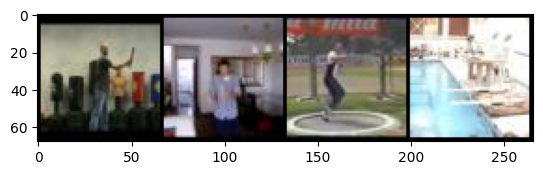

In [ ]:
import torchvision
dataiter = iter(image_dataloader)
data = next(dataiter)
images, labels = data['image'], data['Label']

# print images
imshow(torchvision.utils.make_grid(images))
#print labels
print(labels)

In [ ]:
image_dataset_train=ActionDataset(root_dir='./data/trainClips/',labels=label_train,transform=T.ToTensor())

image_dataloader_train = DataLoader(image_dataset_train, batch_size=32,
                        shuffle=True, num_workers=4)
image_dataset_val=ActionDataset(root_dir='./data/valClips/',labels=label_val,transform=T.ToTensor())

image_dataloader_val = DataLoader(image_dataset_val, batch_size=32,
                        shuffle=False, num_workers=4)

In [ ]:
# Constant to control how frequently we print train loss
print_every = 100

In [ ]:
class Net(nn.Module):

    #define the learnable paramters by calling the respective modules (nn.Conv2d, nn.MaxPool2d etc.)
    def __init__(self):
        super(Net, self).__init__()

        #calling conv2d module for convolution
        self.conv1 = nn.Conv2d(3, 8, kernel_size=7, stride=1)

        #calling MaxPool2d module for max pooling with downsampling of 2
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv2 = nn.Conv2d(8, 16, kernel_size=7, stride=1)



        #fully connected layer
        self.fc1 = nn.Linear(1936, 10)


    #defining the structure of the network
    def forward(self, x):
        #Applying relu activation after each conv layer
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))


        #reshaping to 1d for giving input to fully connected units
        x = x.view(-1, 1936)

        x = self.fc1(F.relu(x))
        return x

fixed_model = Net().cuda()

#Printing the network architecture
print(fixed_model)


Net(
  (conv1): Conv2d(3, 8, kernel_size=(7, 7), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(8, 16, kernel_size=(7, 7), stride=(1, 1))
  (fc1): Linear(in_features=1936, out_features=10, bias=True)
)


In [ ]:
optimizer = torch.optim.SGD(fixed_model.parameters(), lr = 0.01)
loss_fn = nn.CrossEntropyLoss()

In [ ]:
def train(model, loss_fn, optimizer, dataloader, num_epochs = 1):
    for epoch in range(num_epochs):
        print('Starting epoch %d / %d' % (epoch + 1, num_epochs))
        check_accuracy(fixed_model, image_dataloader_val)# check accuracy on the training set

        model.train()
        for t, sample in enumerate(dataloader):
            x_var = sample['image'].cuda()
            y_var = sample['Label'].long().cuda()

            scores = model(x_var)

            loss = loss_fn(scores, y_var)
            if (t + 1) % print_every == 0:
                print('t = %d, loss = %.4f' % (t + 1, loss.data.item()))

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

def check_accuracy(model, loader):
    '''
    if loader.dataset.train:
        print('Checking accuracy on validation set')
    else:
        print('Checking accuracy on test set')
    '''
    num_correct = 0
    num_samples = 0
    model.eval() # Put the model in test mode (the opposite of model.train(), essentially)
    for t, sample in enumerate(loader):
        x_var = sample['image'].cuda()
        y_var = sample['Label']

        scores = model(x_var)
        _, preds = scores.data.cpu().max(1)

        num_correct += (preds.numpy() == y_var.numpy()).sum()
        num_samples += preds.size(0)
    acc = float(num_correct) / num_samples
    print('Got %d / %d correct (%.2f)' % (num_correct, num_samples, 100 * acc))





In [ ]:
fixed_model.cuda()
fixed_model.train()
train(fixed_model, loss_fn, optimizer,image_dataloader_train, num_epochs=4)
check_accuracy(fixed_model, image_dataloader_train)# check accuracy on the training set


Starting epoch 1 / 4
Got 623 / 6690 correct (9.31)
t = 100, loss = 2.2553
t = 200, loss = 2.0391
t = 300, loss = 1.8348
t = 400, loss = 1.7170
t = 500, loss = 1.2369
t = 600, loss = 0.8600
t = 700, loss = 0.9140
Starting epoch 2 / 4
Got 3089 / 6690 correct (46.17)
t = 100, loss = 0.6888
t = 200, loss = 0.9651
t = 300, loss = 1.1785
t = 400, loss = 0.8150
t = 500, loss = 0.2608
t = 600, loss = 0.4324
t = 700, loss = 0.4662
Starting epoch 3 / 4
Got 3280 / 6690 correct (49.03)
t = 100, loss = 0.5431
t = 200, loss = 0.2613
t = 300, loss = 0.3358
t = 400, loss = 0.4217
t = 500, loss = 0.7277
t = 600, loss = 0.7606
t = 700, loss = 0.4825
Starting epoch 4 / 4
Got 3215 / 6690 correct (48.06)
t = 100, loss = 0.5449
t = 200, loss = 0.4466
t = 300, loss = 0.2474
t = 400, loss = 0.3557
t = 500, loss = 0.1266
t = 600, loss = 0.7561
t = 700, loss = 0.1452
Got 21848 / 23310 correct (93.73)


In [ ]:
check_accuracy(fixed_model, image_dataloader_val)#check accuracy on the validation set

Got 3475 / 6690 correct (51.94)


# Input Video Clip

In [ ]:
class ActionClipDataset(Dataset):
    """Action Landmarks dataset."""

    def __init__(self,  root_dir,labels=[], transform=None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """

        self.root_dir = root_dir
        self.transform = transform
        self.length=len(os.listdir(self.root_dir))
        self.labels=labels

    def __len__(self):
        return self.length

    def __getitem__(self, idx):

        folder=idx+1
        folder=format(folder,'05d')
        clip=[]
        if len(self.labels)!=0:
            Label=self.labels[idx][0]-1
        for i in range(3):
            imidx=i+1
            imgname=str(imidx)+'.jpg'
            img_path = os.path.join(self.root_dir,
                                    folder,imgname)
            image = Image.open(img_path)
            image=np.array(image)
            clip.append(image)
        if self.transform:
            clip=np.asarray(clip)
            clip=np.transpose(clip, (0,3,1,2))
            clip = torch.from_numpy(np.asarray(clip))
            clip = clip/255.0
        if len(self.labels)!=0:
            sample={'clip':clip,'Label':Label,'folder':folder}
        else:
            sample={'clip':clip,'folder':folder}
        return sample

clip_dataset=ActionClipDataset(root_dir='./data/trainClips/',labels=label_train,transform=T.ToTensor())
for i in range(10):
    sample=clip_dataset[i]
    print(sample['clip'].shape)
    print(sample['Label'])
    print(sample['folder'])

torch.Size([3, 3, 64, 64])
0.0
00001
torch.Size([3, 3, 64, 64])
0.0
00002
torch.Size([3, 3, 64, 64])
0.0
00003
torch.Size([3, 3, 64, 64])
0.0
00004
torch.Size([3, 3, 64, 64])
0.0
00005
torch.Size([3, 3, 64, 64])
0.0
00006
torch.Size([3, 3, 64, 64])
0.0
00007
torch.Size([3, 3, 64, 64])
0.0
00008
torch.Size([3, 3, 64, 64])
0.0
00009
torch.Size([3, 3, 64, 64])
0.0
00010


In [ ]:
clip_dataloader = DataLoader(clip_dataset, batch_size=4,
                        shuffle=True, num_workers=4)


for i,sample in enumerate(clip_dataloader):
    print(i,sample['clip'].shape,sample['folder'],sample['Label'])
    if i>20:
        break

0 torch.Size([4, 3, 3, 64, 64]) ['04886', '02386', '00485', '02187'] tensor([5., 2., 0., 2.], dtype=torch.float64)
1 torch.Size([4, 3, 3, 64, 64]) ['03444', '00792', '02352', '00492'] tensor([3., 0., 2., 0.], dtype=torch.float64)
2 torch.Size([4, 3, 3, 64, 64]) ['07540', '06224', '00686', '03231'] tensor([9., 7., 0., 3.], dtype=torch.float64)
3 torch.Size([4, 3, 3, 64, 64]) ['00674', '01082', '00077', '00210'] tensor([0., 1., 0., 0.], dtype=torch.float64)
4 torch.Size([4, 3, 3, 64, 64]) ['05704', '06538', '06708', '03718'] tensor([7., 8., 8., 4.], dtype=torch.float64)
5 torch.Size([4, 3, 3, 64, 64]) ['07306', '00497', '03033', '05153'] tensor([9., 0., 3., 6.], dtype=torch.float64)
6 torch.Size([4, 3, 3, 64, 64]) ['01371', '06415', '04592', '01971'] tensor([1., 7., 5., 2.], dtype=torch.float64)
7 torch.Size([4, 3, 3, 64, 64]) ['04845', '02261', '00339', '05607'] tensor([5., 2., 0., 6.], dtype=torch.float64)
8 torch.Size([4, 3, 3, 64, 64]) ['02274', '07199', '05199', '05352'] tensor([2.,

tensor([9., 5., 4., 4.], dtype=torch.float64)


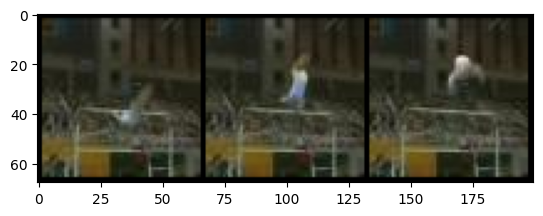

In [ ]:
import torchvision
dataiter = iter(clip_dataloader)
data = next(dataiter)
images, labels = data['clip'], data['Label']

# print images
imshow(torchvision.utils.make_grid(images[0]))
#print labels
print(labels)

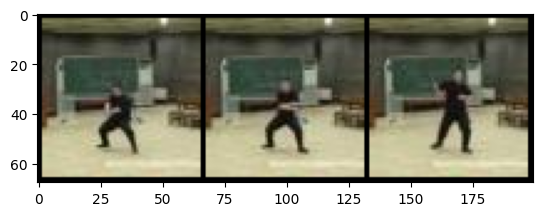

In [ ]:
imshow(torchvision.utils.make_grid(images[1]))

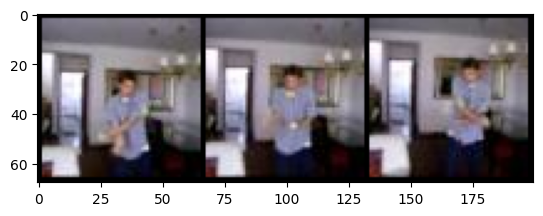

In [ ]:
imshow(torchvision.utils.make_grid(images[2]))

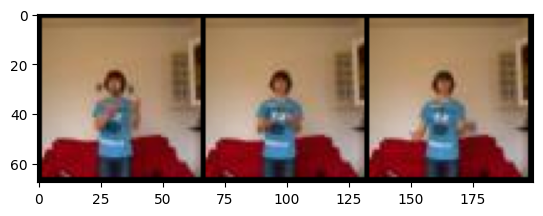

In [ ]:
imshow(torchvision.utils.make_grid(images[3]))

In [ ]:
clip_dataset_train=ActionClipDataset(root_dir='./data/trainClips/',labels=label_train,transform=T.ToTensor())

clip_dataloader_train = DataLoader(clip_dataset_train, batch_size=16,
                        shuffle=True, num_workers=4)
clip_dataset_val=ActionClipDataset(root_dir='./data/valClips/',labels=label_val,transform=T.ToTensor())

clip_dataloader_val = DataLoader(clip_dataset_val, batch_size=16,
                        shuffle=True, num_workers=4)


In [ ]:
class Net3D(nn.Module):

    #define the learnable paramters by calling the respective modules (nn.Conv2d, nn.MaxPool2d etc.)
    def __init__(self):
        super(Net3D, self).__init__()

        #calling conv3d module for convolution
        self.conv1 = nn.Conv3d(in_channels = 3, out_channels = 50, kernel_size = 2, stride = 1)

        #calling MaxPool3d module for max pooling with downsampling of 2
        self.pool1 = nn.MaxPool3d(kernel_size=(1, 2, 2), stride=2)

        self.conv2 =  nn.Conv3d(in_channels = 50, out_channels = 100, kernel_size = (1, 3, 3), stride = 1)

        self.pool2 = nn.MaxPool3d(kernel_size=(1, 3, 3), stride=2)



        #fully connected layer
        self.fc1 = nn.Linear(19600, 10)


    #defining the structure of the network
    def forward(self, x):
        #Applying relu activation after each conv layer
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))


        #reshaping to 1d for giving input to fully connected units
        x = x.view(-1, 19600)

        x = self.fc1(F.relu(x))
        return x

fixed_model_3d = Net3D().cuda()

#Printing the network architecture
print(fixed_model_3d)


Net3D(
  (conv1): Conv3d(3, 50, kernel_size=(2, 2, 2), stride=(1, 1, 1))
  (pool1): MaxPool3d(kernel_size=(1, 2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv3d(50, 100, kernel_size=(1, 3, 3), stride=(1, 1, 1))
  (pool2): MaxPool3d(kernel_size=(1, 3, 3), stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=19600, out_features=10, bias=True)
)


In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.RMSprop(fixed_model_3d.parameters(), lr=1e-4)


In [ ]:
def train_3d(model, loss_fn, optimizer,dataloader,num_epochs = 1):
    for epoch in range(num_epochs):
        print('Starting epoch %d / %d' % (epoch + 1, num_epochs))
        check_accuracy_3d(fixed_model_3d, clip_dataloader_val)
        model.train()
        for t, sample in enumerate(dataloader):
            x_var = sample['clip'].cuda()
            y_var = sample['Label'].long().cuda()

            scores = model(x_var)

            loss = loss_fn(scores, y_var)
            if (t + 1) % print_every == 0:
                print('t = %d, loss = %.4f' % (t + 1, loss.data.item()))

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

def check_accuracy_3d(model, loader):
    num_correct = 0
    num_samples = 0
    model.eval() # Put the model in test mode (the opposite of model.train(), essentially)
    for t, sample in enumerate(loader):
        x_var = sample['clip'].cuda()
        y_var = sample['Label']
        y_var=y_var.cpu()
        scores = model(x_var)
        _, preds = scores.data.cpu().max(1)

        num_correct += (preds.numpy() == y_var.numpy()).sum()
        num_samples += preds.size(0)
    acc = float(num_correct) / num_samples
    print('Got %d / %d correct (%.2f)' % (num_correct, num_samples, 100 * acc))

In [ ]:
fixed_model_3d.train()
train_3d(fixed_model_3d, loss_fn, optimizer,clip_dataloader_train, num_epochs=5)
fixed_model_3d.eval()
check_accuracy_3d(fixed_model_3d, clip_dataloader_train)
check_accuracy_3d(fixed_model_3d, clip_dataloader_val)

Starting epoch 1 / 5
Got 983 / 2230 correct (44.08)
t = 100, loss = 1.2243
t = 200, loss = 1.5891
t = 300, loss = 0.7339
t = 400, loss = 0.7461
Starting epoch 2 / 5
Got 1277 / 2230 correct (57.26)
t = 100, loss = 0.5645
t = 200, loss = 0.4915
t = 300, loss = 0.4444
t = 400, loss = 0.8010
Starting epoch 3 / 5
Got 1304 / 2230 correct (58.48)
t = 100, loss = 0.6582
t = 200, loss = 0.3760
t = 300, loss = 0.1985
t = 400, loss = 0.4589
Starting epoch 4 / 5
Got 1338 / 2230 correct (60.00)
t = 100, loss = 0.3561
t = 200, loss = 0.3614
t = 300, loss = 0.1381
t = 400, loss = 0.2603
Starting epoch 5 / 5
Got 1318 / 2230 correct (59.10)
t = 100, loss = 0.1599
t = 200, loss = 0.3537
t = 300, loss = 0.0449
t = 400, loss = 0.1633
Got 7466 / 7770 correct (96.09)
Got 1342 / 2230 correct (60.18)


# Exercise
- Use the previous single image network to train on the clip dataset. Take an average of the model output of the 3 images in the clip before calculating the combined loss for one sample
- Use only fully connected layers. Parallel FC layers to handle the images in a clip.
  - i.e., Parallel FC layers for each image

## Average of 3 images in clip before calculating loss

In [ ]:
class Net(nn.Module):

    #define the learnable paramters by calling the respective modules (nn.Conv2d, nn.MaxPool2d etc.)
    def __init__(self):
        super(Net, self).__init__()

        #calling conv2d module for convolution
        self.conv1 = nn.Conv2d(3, 8, kernel_size=7, stride=1)

        #calling MaxPool2d module for max pooling with downsampling of 2
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv2 = nn.Conv2d(8, 16, kernel_size=7, stride=1)



        #fully connected layer
        self.fc1 = nn.Linear(1936, 10)


    #defining the structure of the network
    def forward(self, x):
        #Applying relu activation after each conv layer
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))


        #reshaping to 1d for giving input to fully connected units
        x = x.view(-1, 1936)

        x = self.fc1(F.relu(x))
        return x

model = Net().cuda()

#Printing the network architecture
print(model)


Net(
  (conv1): Conv2d(3, 8, kernel_size=(7, 7), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(8, 16, kernel_size=(7, 7), stride=(1, 1))
  (fc1): Linear(in_features=1936, out_features=10, bias=True)
)


In [ ]:
optimizer = torch.optim.SGD(fixed_model.parameters(), lr = 0.01)
loss_fn = nn.CrossEntropyLoss()

In [ ]:
def train(model, loss_fn, optimizer, dataloader, num_epochs = 1):
    for epoch in range(num_epochs):
        print('Starting epoch %d / %d' % (epoch + 1, num_epochs))
        check_accuracy(fixed_model, clip_dataloader_val)# check accuracy on the training set

        model.train()
        for t, sample in enumerate(dataloader):
            x_var = sample['clip'].cuda()
            y_var = sample['Label'].long().cuda()

            img1 = model(x_var[:,0,:,:])
            img2 = model(x_var[:,1,:,:])
            img3 = model(x_var[:,2,:,:])
            scores=(img1+img2+img3)/3

            loss = loss_fn(scores, y_var)
            if (t + 1) % print_every == 0:
                print('t = %d, loss = %.4f' % (t + 1, loss.data.item()))

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

def check_accuracy(model, loader):

    num_correct = 0
    num_samples = 0
    model.eval() # Put the model in test mode (the opposite of model.train(), essentially)
    for t, sample in enumerate(loader):
        x_var = sample['clip'].cuda()
        y_var = sample['Label']

        img1 = model(x_var[:,0,:,:])
        img2 = model(x_var[:,1,:,:])
        img3 = model(x_var[:,2,:,:])
        scores=(img1+img2+img3)/3
        _, preds = scores.data.cpu().max(1)

        num_correct += (preds.numpy() == y_var.numpy()).sum()
        num_samples += preds.size(0)
    acc = float(num_correct) / num_samples
    print('Got %d / %d correct (%.2f)' % (num_correct, num_samples, 100 * acc))


In [ ]:
model.cuda()
model.train()
train(model, loss_fn, optimizer,clip_dataloader_train, num_epochs=4)
check_accuracy(model, clip_dataloader_val)
check_accuracy(model, clip_dataloader_train)

Starting epoch 1 / 4
Got 1185 / 2230 correct (53.14)
t = 100, loss = 2.2936
t = 200, loss = 2.3053
t = 300, loss = 2.3071
t = 400, loss = 2.3146
Starting epoch 2 / 4
Got 1185 / 2230 correct (53.14)
t = 100, loss = 2.3076
t = 200, loss = 2.3093
t = 300, loss = 2.3034
t = 400, loss = 2.3212
Starting epoch 3 / 4
Got 1185 / 2230 correct (53.14)
t = 100, loss = 2.3105
t = 200, loss = 2.3025
t = 300, loss = 2.3021
t = 400, loss = 2.3017
Starting epoch 4 / 4
Got 1185 / 2230 correct (53.14)
t = 100, loss = 2.2987
t = 200, loss = 2.2974
t = 300, loss = 2.3044
t = 400, loss = 2.3082
Got 216 / 2230 correct (9.69)
Got 904 / 7770 correct (11.63)


## Using FC layers

In [ ]:
class Net3D_fc(nn.Module):

    #define the learnable paramters by calling the respective modules (nn.Conv2d, nn.MaxPool2d etc.)
    def __init__(self):
        super(Net3D_fc, self).__init__()
        self.img1a=nn.Linear(64*64*3,4096)
        self.img1b=nn.Linear(4096,2048)
        self.img1c=nn.Linear(2048,1024)

        self.img2a=nn.Linear(64*64*3,4096)
        self.img2b=nn.Linear(4096,2048)
        self.img2c=nn.Linear(2048,1024)

        self.img3a=nn.Linear(64*64*3,4096)
        self.img3b=nn.Linear(4096,2048)
        self.img3c=nn.Linear(2048,1024)

        self.fc_head = nn.Linear(3072, 10)


    #defining the structure of the network
    def forward(self, x):
        #Applying relu activation after each conv layer
        x1=x[:,0,:,:].view(-1, 64*64*3)
        x2=x[:,1,:,:].view(-1, 64*64*3)
        x3=x[:,2,:,:].view(-1, 64*64*3)

        x1=self.img1a(F.relu(x1))
        x1=self.img1b(F.relu(x1))
        x1=self.img1c(F.relu(x1))

        x2=self.img2a(F.relu(x2))
        x2=self.img2b(F.relu(x2))
        x2=self.img2c(F.relu(x2))

        x3=self.img3a(F.relu(x3))
        x3=self.img3b(F.relu(x3))
        x3=self.img3c(F.relu(x3))
        x=self.fc_head(F.relu(torch.cat((x1,x2,x3),1)))


        return x

fixed_model_3d = Net3D_fc().cuda()

#Printing the network architecture
print(fixed_model_3d)


Net3D_fc(
  (img1a): Linear(in_features=12288, out_features=4096, bias=True)
  (img1b): Linear(in_features=4096, out_features=2048, bias=True)
  (img1c): Linear(in_features=2048, out_features=1024, bias=True)
  (img2a): Linear(in_features=12288, out_features=4096, bias=True)
  (img2b): Linear(in_features=4096, out_features=2048, bias=True)
  (img2c): Linear(in_features=2048, out_features=1024, bias=True)
  (img3a): Linear(in_features=12288, out_features=4096, bias=True)
  (img3b): Linear(in_features=4096, out_features=2048, bias=True)
  (img3c): Linear(in_features=2048, out_features=1024, bias=True)
  (fc_head): Linear(in_features=3072, out_features=10, bias=True)
)


In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.RMSprop(fixed_model_3d.parameters(), lr=1e-4)


In [ ]:
fixed_model_3d.train()
train_3d(fixed_model_3d, loss_fn, optimizer,clip_dataloader_train, num_epochs=5)
fixed_model_3d.eval()
check_accuracy_3d(fixed_model_3d, clip_dataloader_train)
check_accuracy_3d(fixed_model_3d, clip_dataloader_val)

Starting epoch 1 / 5
Got 265 / 2230 correct (11.88)
t = 100, loss = 2.1454
t = 200, loss = 1.3302
t = 300, loss = 1.8952
t = 400, loss = 0.7070
Starting epoch 2 / 5
Got 812 / 2230 correct (36.41)
t = 100, loss = 0.6918
t = 200, loss = 0.7566
t = 300, loss = 0.8296
t = 400, loss = 0.8093
Starting epoch 3 / 5
Got 814 / 2230 correct (36.50)
t = 100, loss = 0.5173
t = 200, loss = 0.4239
t = 300, loss = 0.6629
t = 400, loss = 0.1448
Starting epoch 4 / 5
Got 908 / 2230 correct (40.72)
t = 100, loss = 0.1135
t = 200, loss = 1.6944
t = 300, loss = 0.2320
t = 400, loss = 0.2662
Starting epoch 5 / 5
Got 998 / 2230 correct (44.75)
t = 100, loss = 0.1085
t = 200, loss = 0.1581
t = 300, loss = 0.2218
t = 400, loss = 0.1641
Got 7342 / 7770 correct (94.49)
Got 850 / 2230 correct (38.12)
